In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.iloc[:,1:]

In [6]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

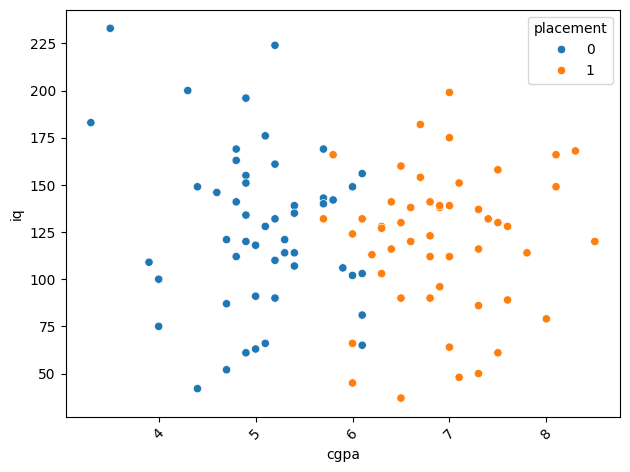

In [8]:
sns.scatterplot(x='cgpa',y='iq',hue='placement',data=df)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [9]:
x = df.iloc[:,0:2]
y= df.iloc[:,-1]

In [10]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y.shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1)

In [13]:
X_train

,cgpa,iq
8,6.1,156.0
18,4.0,100.0
14,6.1,103.0
0,6.8,123.0
41,5.4,114.0
...,...,...
69,8.5,120.0
71,6.1,132.0
82,6.5,37.0
43,6.8,141.0


In [14]:
Y_train

,placement
8,0
18,0
14,0
0,1
41,0
...,...
69,1
71,1
82,1
43,1


In [15]:
X_test

,cgpa,iq
50,3.5,233.0
57,6.5,130.0
97,6.7,182.0
75,4.8,169.0
44,7.5,61.0
64,7.0,64.0
93,6.8,112.0
16,5.2,224.0
35,6.8,90.0
2,5.3,121.0


In [16]:
Y_test

,placement
50,0
57,1
97,1
75,0
44,1
64,1
93,1
16,0
35,1
2,0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[ 0.09812886,  0.9281668 ],
       [-1.75650658, -0.59659222],
       [ 0.09812886, -0.5149087 ],
       [ 0.71634067,  0.02964809],
       [-0.52008295, -0.21540246],
       [-0.6967149 , -0.86887061],
       [ 0.00981289, -2.0941234 ],
       [-1.13829477, -0.95055413],
       [ 1.42286846, -0.89609845],
       [ 1.33455248,  0.98262248],
       [-1.04997879,  0.5197492 ],
       [ 0.00981289, -0.54213654],
       [-2.37471839,  1.66331847],
       [-1.40324269, -2.17580691],
       [-0.96166282, -1.65847796],
       [-1.13829477, -1.90352852],
       [ 1.24623651,  0.27469865],
       [-0.25513503,  1.28212871],
       [-0.6967149 ,  0.27469865],
       [ 0.09812886, -1.11392117],
       [-0.16681906,  1.20044519],
       [ 0.80465664,  0.46529353],
       [-1.04997879, -0.26985814],
       [-1.22661074,  0.6558884 ],
       [ 0.45139275, -0.86887061],
       [-0.96166282,  0.90093896],
       [-0.52008295,  0.46529353],
       [ 1.5995004 , -0.21540246],
       [-1.13829477,

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[-2.19808644,  3.02471045],
       [ 0.45139275,  0.22024297],
       [ 0.6280247 ,  1.63609063],
       [-1.04997879,  1.28212871],
       [ 1.33455248, -1.65847796],
       [ 0.89297262, -1.57679444],
       [ 0.71634067, -0.26985814],
       [-0.6967149 ,  2.77965989],
       [ 0.71634067, -0.86887061],
       [-0.60839893, -0.02480759]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [25]:
y_pred = clf.predict(X_test)

In [26]:
Y_test

,placement
50,0
57,1
97,1
75,0
44,1
64,1
93,1
16,0
35,1
2,0


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(Y_test,y_pred)

1.0

In [29]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

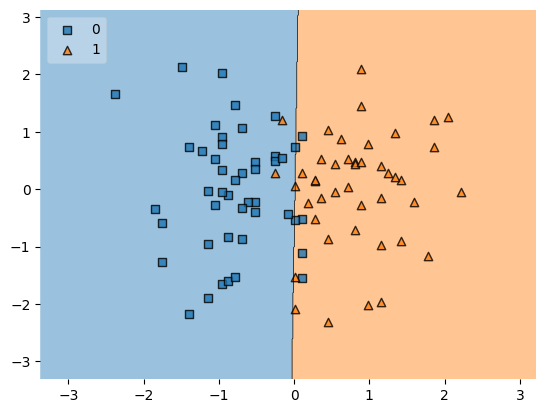

In [30]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [31]:
import pickle

In [32]:
pickle.dump(clf,open('model.pkl','wb'))